# Classification des CV avec NLP
#### Baptiste Le Berre, Jérémy Le Joncour

Les entreprises reçoivent souvent des milliers de CVs pour chaque offre d'emploi et emploient des agents de contrôle dédiés pour sélectionner les candidats qualifiés. Votre objectif est de développer un modèle IA pour le filtrage des CVs.

## Contexte
Embaucher les bons talents est un défi pour toutes les entreprises. Ce défi est amplifié par le volume élevé de candidats si l'entreprise est bien réputée. Dans une organisation de services typique, des professionnels possédant une variété de compétences techniques et d'expertise sont embauchés et affectés à des projets pour résoudre les problèmes des clients.

En règle générale, les grandes entreprises n'ont pas assez de temps pour ouvrir chaque CV. L’idée du projet est d’utiliser des algorithmes d'apprentissage automatique pour la tâche de filtrage de CV.

## Objectif
Le code doit bien être structuré, avec des visualisations sur le jeux de données (affichage par catégories, affichages des mots les plus fréquents (wordcloud), etc), des explications sur le choix du modèle utilisé et finalement une évaluation de la performance du modèle.

## Traitement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv("DataSet.csv", sep=',')
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

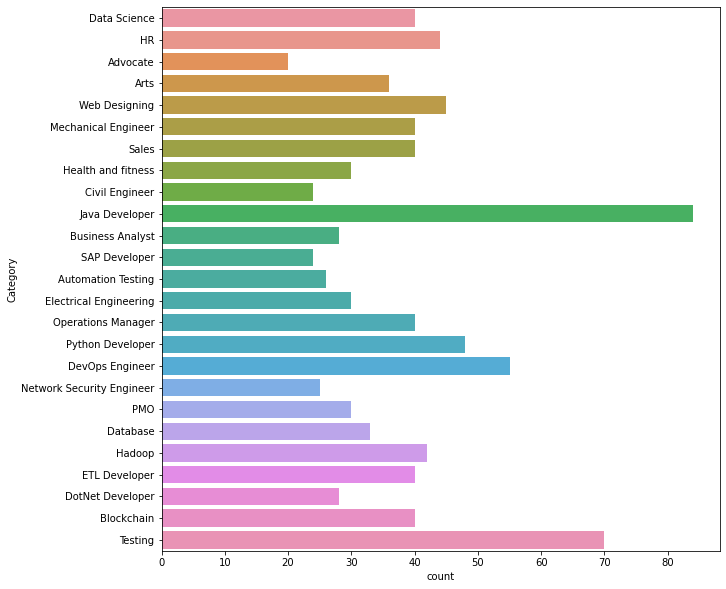

In [15]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(y="Category", data=data)

### Modifications

In [5]:
import re

def modified(text):
    sub_digit = re.sub('[^A-Za-z ]+', '', text)

    return sub_digit.lower()

In [6]:
modified_resume = []

for i in data['Resume']:
    modified_resume.append(modified(i))

In [7]:
data['Resume'] = modified_resume
data

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details may to may be uitrgpvdat...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana...
4,Data Science,education details mca ymcaust faridabad h...
...,...,...
957,Testing,computer skills proficient in ms office word ...
958,Testing,willingness to accept the challenges positiv...
959,Testing,personal skills quick learner eagerness to l...
960,Testing,computer skills software knowledge mspower po...


## Apprentissage

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size = 0.2, random_state=1, stratify=data['Category'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df = 10)
Xtrain = vectorizer.fit_transform(data_train['Resume'])
print(f'Nombre de termes : {len(vectorizer.get_feature_names())}')

Xtrain = Xtrain.toarray()
ytrain = data_train['Category']

print(f'Dimension de Xtrain : {Xtrain.shape}')
print(f'Dimension de ytrain : {ytrain.shape}')

Nombre de termes : 2923
Dimension de Xtrain : (769, 2923)
Dimension de ytrain : (769,)


#### Mots les plus fréquents

In [23]:
freq_word = np.sum(Xtrain, axis=0)
index = np.argsort(freq_word)

dico = {'word':np.asarray(vectorizer.get_feature_names())[index],'frequency':freq_word[index]}
dico = pd.DataFrame(dico).iloc[::-1]
dico[:20]

,word,frequency
2922,exprience,3037
2921,details,2430
2920,project,2128
2919,data,1579
2918,company,1555
2917,management,1418
2916,team,1245
2915,maharashtra,1148
2914,year,1017
2913,testing,969


### Word Cloud

In [51]:
words_list = list()
for cell in (data_train["Resume"]):
    for sentence in cell:
        for word in sentence.split():
            words_list.append(word)

In [117]:
from collections import Counter

c = Counter(words_list)
most_common_list = list()

for word in set(words_list):
    if c[word] > 500:
        most_common_list.append(word)

==== Health and fitness ===


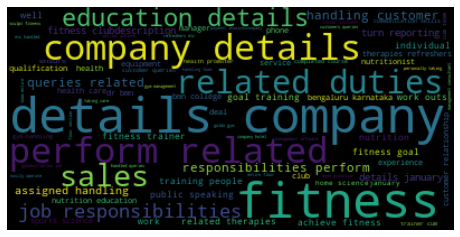

==== ETL Developer ===


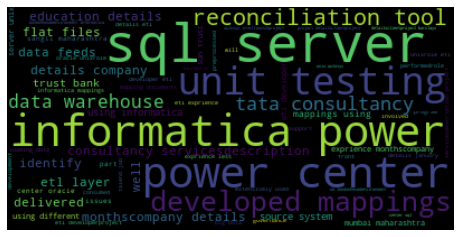

==== PMO ===


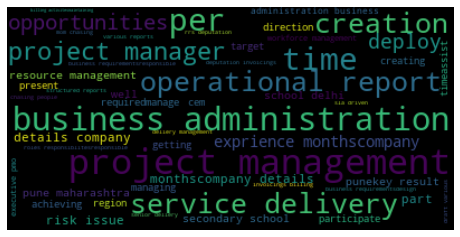

==== DevOps Engineer ===


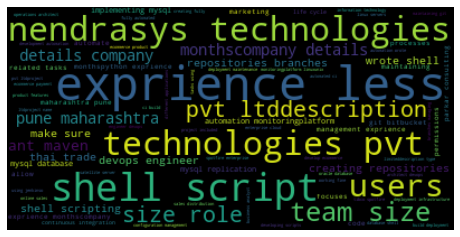

==== Mechanical Engineer ===


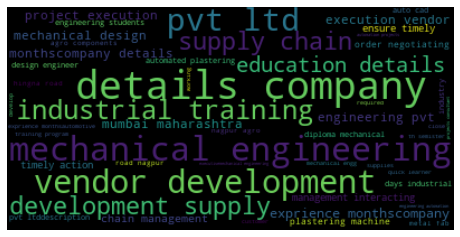

==== Electrical Engineering ===


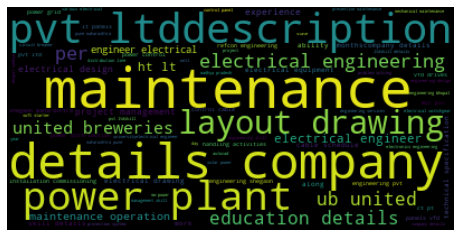

==== Blockchain ===


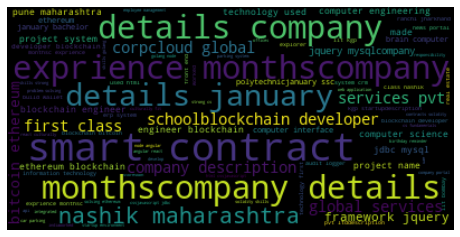

==== DotNet Developer ===


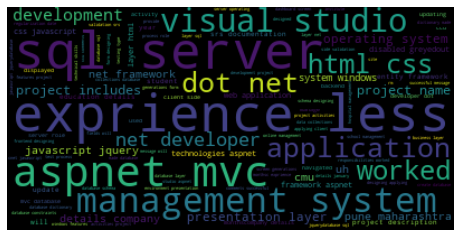

==== Network Security Engineer ===


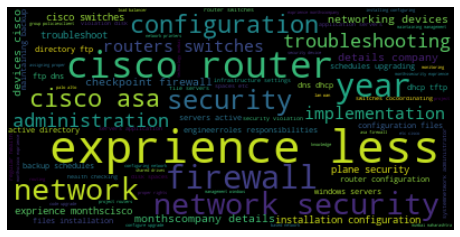

==== Java Developer ===


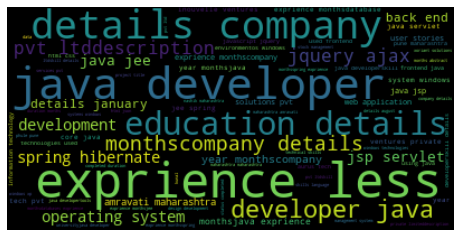

==== Web Designing ===


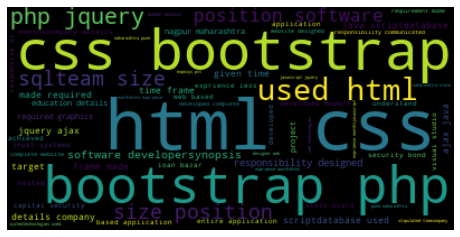

==== Data Science ===


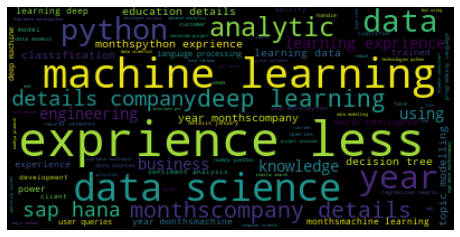

==== Operations Manager ===


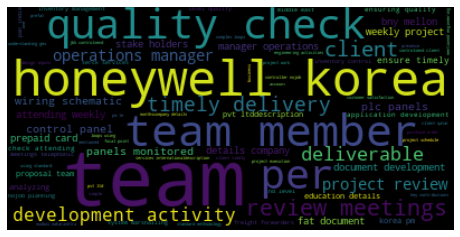

==== SAP Developer ===


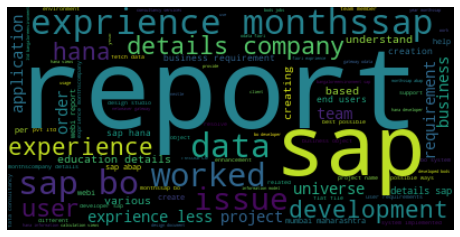

==== Database ===


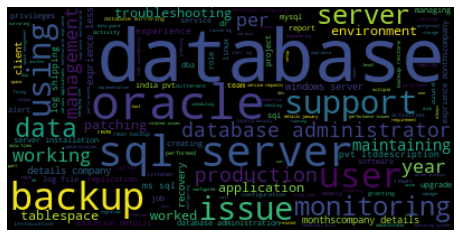

==== HR ===


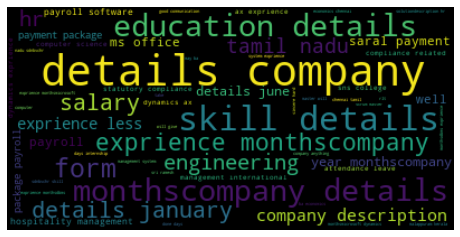

==== Python Developer ===


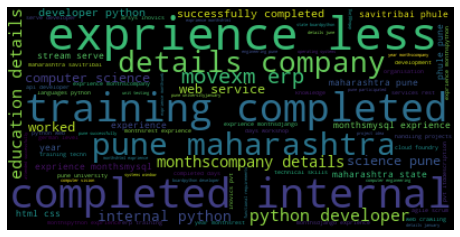

==== Testing ===


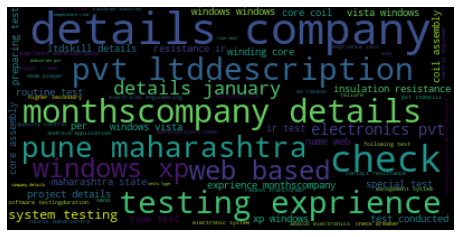

==== Hadoop ===


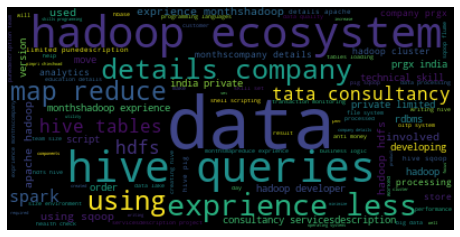

==== Arts ===


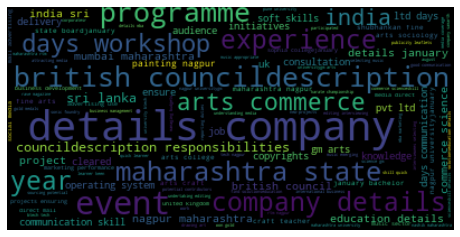

==== Sales ===


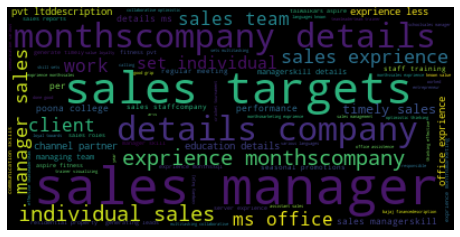

==== Automation Testing ===


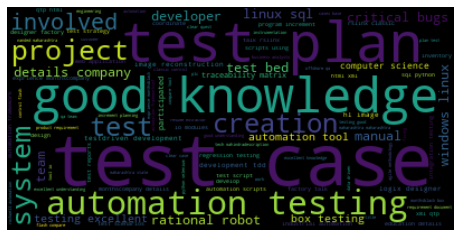

==== Business Analyst ===


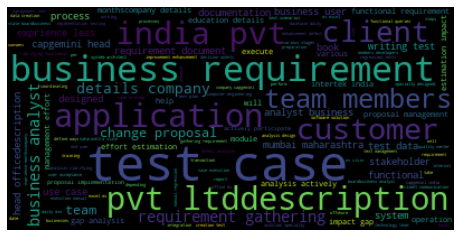

==== Civil Engineer ===


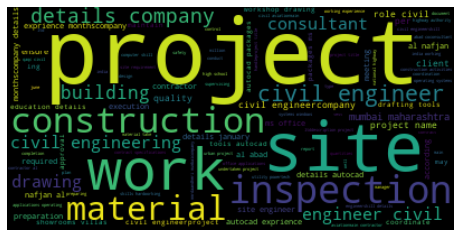

==== Advocate ===


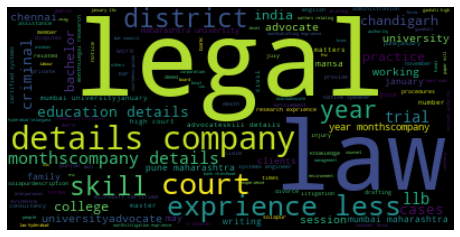

In [118]:
from wordcloud import WordCloud

for category in set(data_train["Category"]):
    #Imprimer la catégorie
    print("====", category, "===")
    
    #Obtenir le texte
    text = data_train["Resume"][data_train["Category"] == category]
    text2 = list()
    for cell in text:
        for word in cell.split():
            #N'ajouter le mot que s'il n'est pas dans la liste des mots les plus communs
            if word not in most_common_list:
                text2.append(word)
    #Supprimer les caractères de liste
    text2 = str(text2).replace("[", "").replace("]", "").replace("'", "").replace(",", "")
    
    #Générer le WordCloud
    wordcloud = WordCloud().generate(text2)
    #L'afficher
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Entrainement du modèle

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
model = model.fit(Xtrain, ytrain)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

In [25]:
Xtest = vectorizer.transform(data_test['Resume'])

In [26]:
ytest = data_test['Category']

In [27]:
prediction = model.predict(Xtest)

In [28]:
from sklearn import metrics

print(metrics.accuracy_score(ytest, prediction).round(3))

0.995


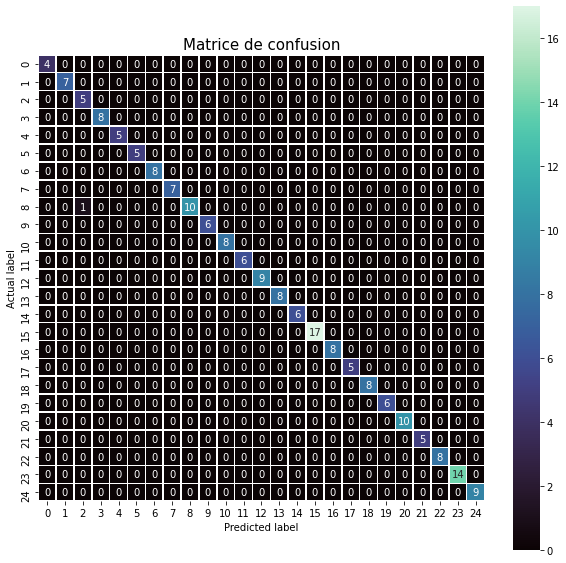

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(ytest, prediction)
plt.figure(figsize=(10,10))
sns.heatmap(c_m, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

### Test de vérification

#### Sur le DataTest

In [55]:
phrase = [data_test['Resume'][353]]
word_choice = vectorizer.transform(phrase)

In [97]:
y_predTest = model.predict(word_choice)
y_predTest

array(['Java Developer'], dtype=object)

In [57]:
ytest[353]

'Java Developer'

#### Description Electrical Engineering

In [110]:
t_2 = 'design, develop, test and supervise the manufacturing of equipment, such as electric motors, radar and navigation systems, communications systems and power generation equipment, states the U.S. Bureau of Labor Statistics.Electronics engineers design and develop electronic equipment, such as broadcast and communications systems — from portable music players to global positioning systems (GPS). If its a practical, real-world device that produces, conducts or uses electricity, in all likelihood, it was designed by an electrical engineer. Additionally, they may conduct or write the specifications for destructive or nondestructive testing of the performance, reliability and long-term durability of devices and components. Today’s design electrical devices and systems using basic components such as conductors, coils, magnets, batteries, switches, resistors, capacitors, inductors, diodes and transistors. Nearly all electronic devices, from the generators at an electric power plant to the microprocessors in your phone, use these few basic components. Critical skills needed in include an in-depth understanding of electrical and electronic theory, mathematics and materials. This knowledge allows engineers to design circuits to perform specific functions and meet requirements for safety, reliability and energy efficiency, and to predict how they will behave, before a hardware design is implemented. Sometimes, though, circuits are constructed on "breadboards," or prototype circuit boards made on computer numeric controlled (CNC) machines for testing before they are put into production.'
t_2 = vectorizer.transform([t_2])
y_pred_2 = model.predict(t_2)
y_pred_2

array(['Electrical Engineering'], dtype=object)

#### CV Avocat

In [111]:
t_3 = 'Family law with 12 years of experience. In-depth knowledge of legal procedures around the family. Efficient, with natural oral fluency and passionate about her job. Listening to his clients and able to build solid files on short deadlines. Great availability. Professional experiences October 2016 - today Family law lawyer Cabinet Robert Pichon 35 RENNES Litigation activities in the field of family law Meetings with clients Contacts with companies and administrations Training of new members of the family law cabinet Cabinet Robert Delors & associés 83 TOULON Pleading activities in family law Meeting with clients Constitution of pleading files Assistant to the principal lawyer October 2005 - March 2010 employee Training Certificate of aptitude for the profession of lawyer obtained in 2005 Master 2 in family law obtained at the law faculty of Rennes 2 in 2004 License in family law obtained in 2003 Qualities and languages spoken Bilingual in English, 900 points obtained at the TOEIC Several language stays in England and Scotland Good level in Italian ( written and spoken) Some basic German Professional skills Proven skills in family law. Strong synthesis skills Oral fluency and able to put together solid files in a very short time. Excellent relationship with customers. Very good ability to adapt to the different cases to be processed and pleaded. Computer skills Proficiency in Office Pack (Excel, Word, PowerPoint and Access). Very comfortable with new technologies.'
t_3 = vectorizer.transform([t_3])
y_pred_3 = model.predict(t_3)
y_pred_3

array(['Advocate'], dtype=object)

#### Data Scientist Description

In [116]:
t_4 = 'Studies / Training to become a Data analyst / Data scientist A Bac + 4 or Bac +5 in IT, management, statistics or marketing is essential to occupy this position. Some training courses at bac + 3 level make it possible to occupy assistant positions. There are still few training courses that provide training in the big data profession, but they are being put in place quickly to meet demand. Examples of training: bac + 3 level AIM in IT Professional license in IT jobs: information systems and data management. Different courses: storage infrastructure and analysis of massive data - big data (University of Burgundy). Bac + 5 level Master MIAGE - IT methods applied to business management Master in IT Different pathways: optimization and operational research (University of Nantes), machine learning and data mining (University of Saint Etienne), data and connected systems (University of Saint -Etienne), big data (University of Cergy), embedded artificial intelligence (University of Cergy), data mining (University of Lyon 2), MIASHS: big data and data mining (Paris 8), master of science in informatics - MOSIG (Ensimag) Master SIAD - information and decision support systems Different courses: data sciences, business intelligence'
t_4 = vectorizer.transform([t_4]) 
y_pred_4 = model.predict(t_4)
y_pred_4

array(['Data Science'], dtype=object)

Le dataset présente plusieurs réplicats qui peuvent se trouver autant dans le Trainset que dans le Testset, ce qui explique la précision élevée du modèle. Un autre dataset a été récupéré.